# Нормализация данных
TODO
1. сделать нормализацию control в зависимости от марки машины (done)
1. построить графики траектории движения (done)
   

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pathlib import Path
import json
from glob import glob
from tqdm import tqdm

In [14]:
control_df = pd.read_csv('YandexCup2024v2/YaCupTest/0/control.csv')

In [15]:
control_df.head()

,stamp_ns,acceleration_level,steering
0,36479492,-929,5.739836
1,76459951,-926,5.280618
2,116678417,-918,5.039505
3,156788958,-908,4.734873
4,196857808,-897,4.387096


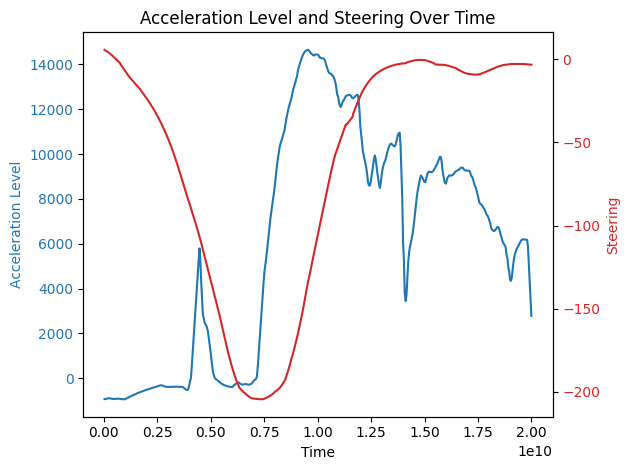

In [16]:
time = control_df['stamp_ns'].values
acceleration_level = control_df.acceleration_level.values
steering = control_df.steering.values
# Создаем фигуру и оси
fig, ax1 = plt.subplots()

# Рисуем график для acceleration_level
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Acceleration Level', color=color)
ax1.plot(time, acceleration_level, color=color, label='Acceleration Level')
ax1.tick_params(axis='y', labelcolor=color)

# Создаем второй объект оси для steering
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Steering', color=color)
ax2.plot(time, steering, color=color, label='Steering')
ax2.tick_params(axis='y', labelcolor=color)

# Добавляем заголовок и легенду
plt.title('Acceleration Level and Steering Over Time')
fig.tight_layout()  # adjusts layout to avoid overlap
plt.show()

In [47]:
time = control_df['stamp_ns'].values
acceleration_level = control_df.acceleration_level.values
steering = control_df.steering.values


In [48]:
acceleration_level.max()

np.int64(14652)

In [49]:
feats = np.hstack((acceleration_level[:, None], steering[:, None]))
frames = quantisize_time(time, feats)

Frame step is 0.02s == 20.0mc


In [50]:
frames.shape

(500, 3)

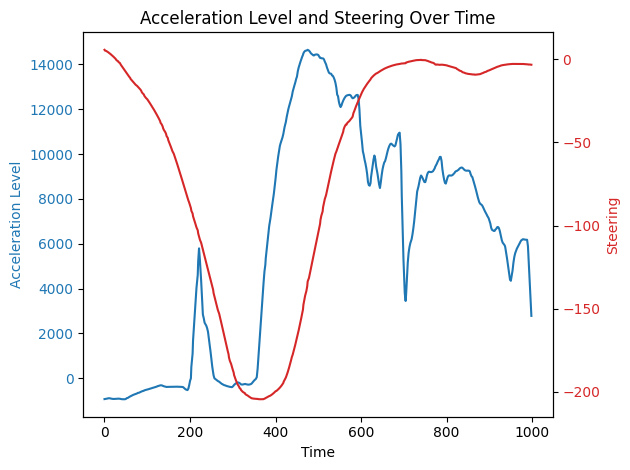

In [51]:
time = frames[:, 0]
acceleration_level =  frames[:, 1]
steering =  frames[:, 2]
# Создаем фигуру и оси
fig, ax1 = plt.subplots()

# Рисуем график для acceleration_level
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Acceleration Level', color=color)
ax1.plot(time, acceleration_level, color=color, label='Acceleration Level')
ax1.tick_params(axis='y', labelcolor=color)

# Создаем второй объект оси для steering
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Steering', color=color)
ax2.plot(time, steering, color=color, label='Steering')
ax2.tick_params(axis='y', labelcolor=color)

# Добавляем заголовок и легенду
plt.title('Acceleration Level and Steering Over Time')
fig.tight_layout()  # adjusts layout to avoid overlap
plt.show()

In [126]:
localization_df = pd.read_csv('YandexCup2024v2/YaCupTest/0/localization.csv')

In [127]:
localization_df.head()

,stamp_ns,x,y,z,roll,pitch,yaw
0,150291,-1482.550597,-1322.015105,-16.021420,0.029898,-0.002234,2.239585
1,40348560,-1482.663555,-1321.869348,-16.014148,0.027247,-0.001937,2.240416
2,80944655,-1482.778791,-1321.723921,-16.013820,0.027035,-0.001530,2.241307
3,120251658,-1482.888223,-1321.586269,-16.010305,0.027869,-0.001452,2.242269
4,160789649,-1483.001171,-1321.444270,-16.010037,0.027590,-0.001363,2.243225


In [130]:
time, axies = localization_df.values[:, 0], localization_df.values[:, 1:]

0


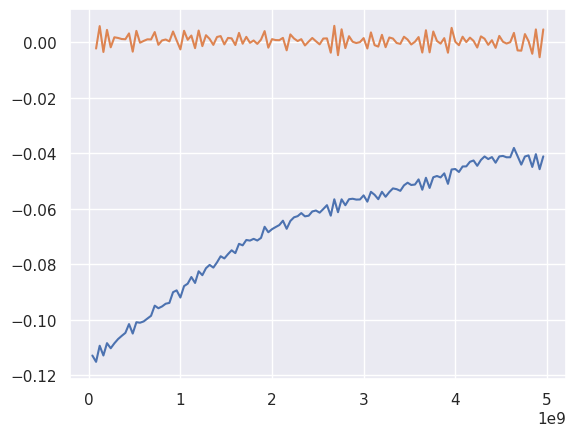

1


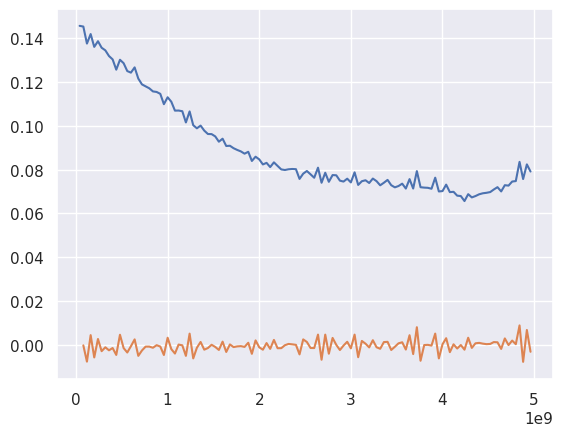

2


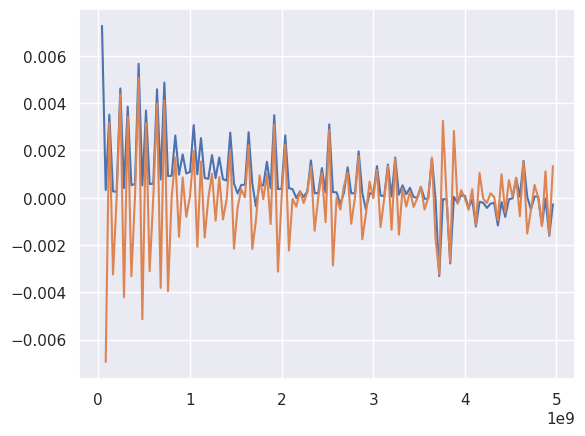

3


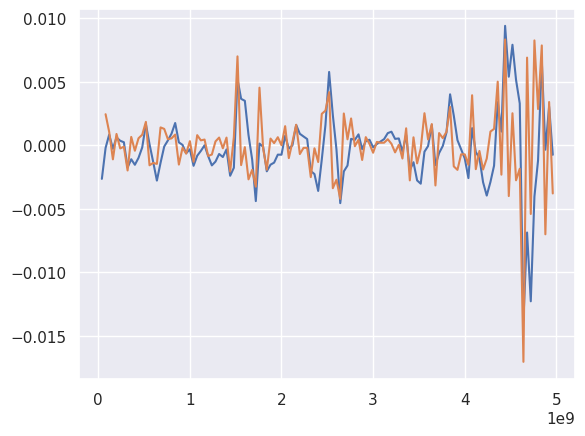

4


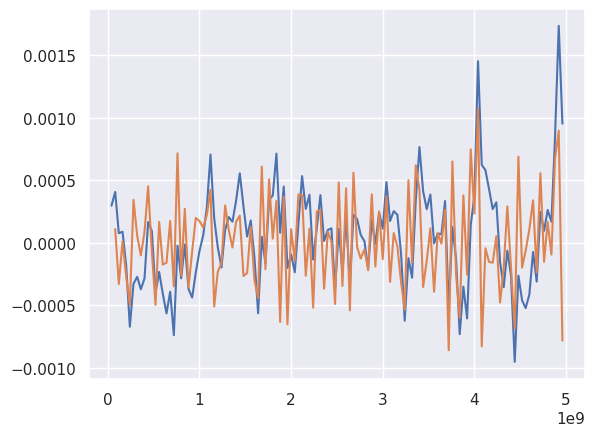

5


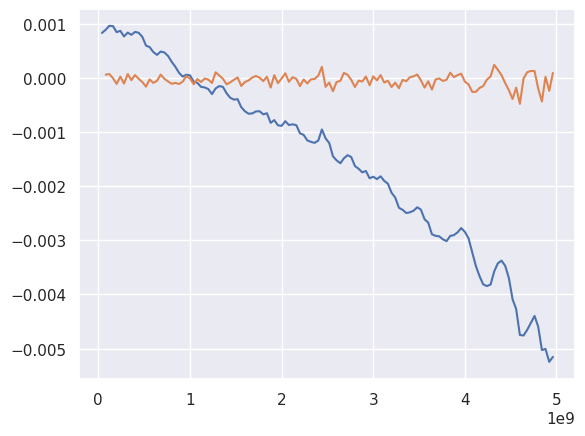

In [144]:
dt = time[1:] - time[:-1]
for i in range(axies.shape[1]):
    print(i)
    a = axies[:, i]
    da = a[1:] - a[:-1]
    plt.plot(time[1:], da) #/np.abs(da).max())
    da2 = da[1:] - da[:-1]
    plt.plot(time[2:], da2)
    #plt.plot(time[1:], dt/np.abs(dt).max())
    plt.show()

In [145]:
da2

array([ 5.96666253e-05,  7.17715696e-05, -6.19982750e-06, -1.10427777e-04,
        2.46436201e-05, -1.04432711e-04,  7.14138843e-05, -4.08284655e-05,
        5.33136842e-05, -1.53626089e-05, -7.61968906e-05, -1.61422258e-04,
       -2.70448010e-05, -9.13458558e-05, -5.28890253e-05,  6.12841395e-05,
       -1.60139896e-05, -6.36565589e-05, -1.08227480e-04, -9.18237823e-05,
       -1.12816798e-04, -6.88310756e-05,  3.27198737e-05, -9.80770775e-06,
       -1.16754082e-04, -2.10606293e-05, -7.49732510e-05, -1.15195792e-05,
       -2.97152180e-05, -9.27644177e-05,  1.03728652e-04,  4.46629673e-05,
       -1.62739715e-05, -1.19372748e-04, -8.12135374e-05, -3.40863394e-05,
        8.42679865e-06, -1.47725566e-04, -7.62603532e-05, -4.49194097e-05,
        6.33623806e-06,  3.60702473e-05,  4.33755674e-06, -5.88469096e-05,
        2.17462316e-05, -1.78561072e-04,  5.09623626e-05, -9.59996017e-05,
       -1.01520358e-05,  8.64871128e-05, -7.13063931e-05,  1.39318430e-05,
       -1.61145324e-05, -

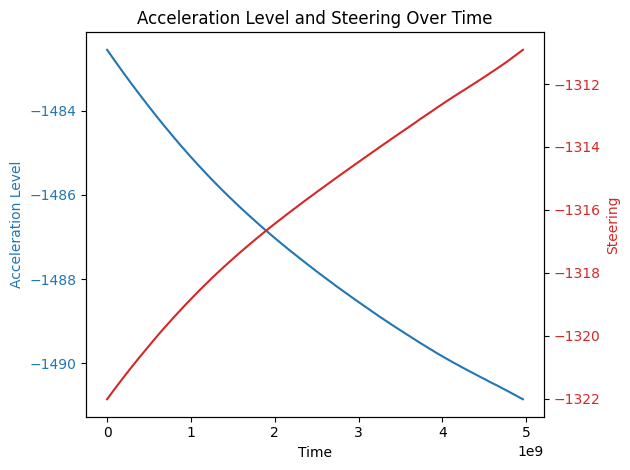

In [56]:
time = localization_df.stamp_ns
acceleration_level =  localization_df.x.values
steering =  localization_df.y.values
# Создаем фигуру и оси
fig, ax1 = plt.subplots()

# Рисуем график для acceleration_level
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Acceleration Level', color=color)
ax1.plot(time, acceleration_level, color=color, label='Acceleration Level')
ax1.tick_params(axis='y', labelcolor=color)

# Создаем второй объект оси для steering
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Steering', color=color)
ax2.plot(time, steering, color=color, label='Steering')
ax2.tick_params(axis='y', labelcolor=color)

# Добавляем заголовок и легенду
plt.title('Acceleration Level and Steering Over Time')
fig.tight_layout()  # adjusts layout to avoid overlap
plt.show()

In [65]:
norm_steering[:100]

array([0.66872545, 0.66760304, 0.66701371, 0.66626914, 0.66541911,
       0.6645086 , 0.6635623 , 0.6624979 , 0.66141375, 0.66028461,
       0.65912496, 0.65793854, 0.65670824, 0.65546525, 0.65425111,
       0.65301883, 0.65177588, 0.65052481, 0.64926897, 0.6468737 ,
       0.64506133, 0.6432188 , 0.64131805, 0.63944111, 0.6376682 ,
       0.63584466, 0.63404045, 0.63229595, 0.63056656, 0.62888496,
       0.62739894, 0.62589623, 0.62440485, 0.62293611, 0.62147808,
       0.62006271, 0.61862302, 0.61719089, 0.61577416, 0.61437493,
       0.61298776, 0.61161474, 0.61021326, 0.60828234, 0.6066398 ,
       0.60486543, 0.60304651, 0.60117308, 0.59958918, 0.59781065,
       0.59599512, 0.59416136, 0.59227532, 0.59030589, 0.58831779,
       0.5862762 , 0.58415566, 0.58230131, 0.58020523, 0.57806061,
       0.57585216, 0.57351522, 0.5712845 , 0.56890911, 0.56646907,
       0.56392375, 0.56142794, 0.55869473, 0.55592314, 0.55342931,
       0.5506671 , 0.54776205, 0.54487012, 0.54204852, 0.53899

In [75]:
localization_df.columns

'stamp_ns'

In [79]:
dataset_info = []
for d in tqdm([*glob('YandexCup2024v2/YaCupTrain/*'), *glob('YandexCup2024v2/YaCupTest/*')]):
    data = {}
    for f in glob(f'{d}/*.csv'):
        bname = Path(f).stem
        df = pd.read_csv(f)
        for i in df.columns:
            v = df[i].values
            data[f'{bname}_{i}_mean'] = v.mean()
            data[f'{bname}_{i}_std'] = v.std()
            data[f'{bname}_{i}_min'] = v.min()
            data[f'{bname}_{i}_max'] = v.max()
    with open(f'{d}/metadata.json') as f:
        meta = json.load(f)
        for k,v in meta.items():
            data[k] = v
    dataset_info.append(data)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [10:55<00:00, 76.26it/s]


AttributeError: module 'pandas' has no attribute 'Dataframe'

In [81]:
df = pd.DataFrame(dataset_info)    
df.head()

,control_stamp_ns_mean,control_stamp_ns_std,control_stamp_ns_min,control_stamp_ns_max,control_acceleration_level_mean,control_acceleration_level_std,control_acceleration_level_min,control_acceleration_level_max,control_steering_mean,control_steering_std,...,ride_date,tires,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,requested_stamps_stamp_ns_mean,requested_stamps_stamp_ns_std,requested_stamps_stamp_ns_min,requested_stamps_stamp_ns_max
0,3.296692e+10,1.732044e+10,2987440736,62946753648,-5.435333,79.189497,-215,149,0.785595,14.531142,...,2022-03-14,"{'front': 0, 'rear': 0}",0,0,0,0,NaN,NaN,NaN,NaN
1,3.297514e+10,1.732047e+10,2995857096,62954734229,-2.474000,94.833876,-251,181,-22.237001,55.047846,...,2022-03-14,"{'front': 0, 'rear': 0}",1,0,0,0,NaN,NaN,NaN,NaN
2,3.297122e+10,1.732047e+10,2991314980,62951512310,8.312000,48.491044,-122,127,12.412247,36.049289,...,2022-03-14,"{'front': 0, 'rear': 0}",2,0,0,1,NaN,NaN,NaN,NaN
3,3.297666e+10,1.732048e+10,2996760373,62956704591,2.689333,48.783435,-121,111,-4.056394,5.468197,...,2022-03-14,"{'front': 0, 'rear': 0}",3,0,0,1,NaN,NaN,NaN,NaN
4,3.297784e+10,1.732049e+10,2997469779,62957568650,-4500.000000,0.000000,-4500,-4500,0.596607,0.000000,...,2022-03-14,"{'front': 0, 'rear': 0}",4,1,1,0,NaN,NaN,NaN,NaN


In [80]:
!pip install seaborn
import seaborn as sns
sns.set()

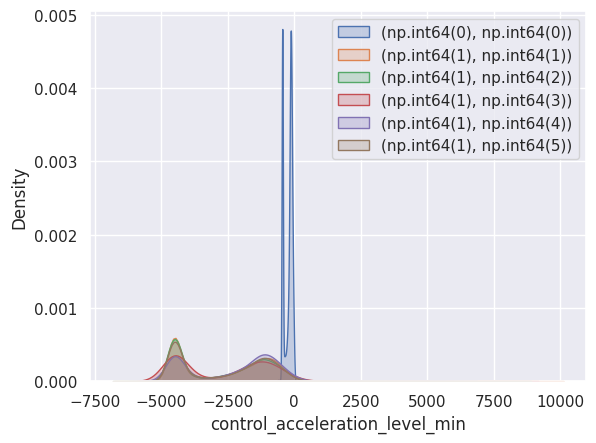

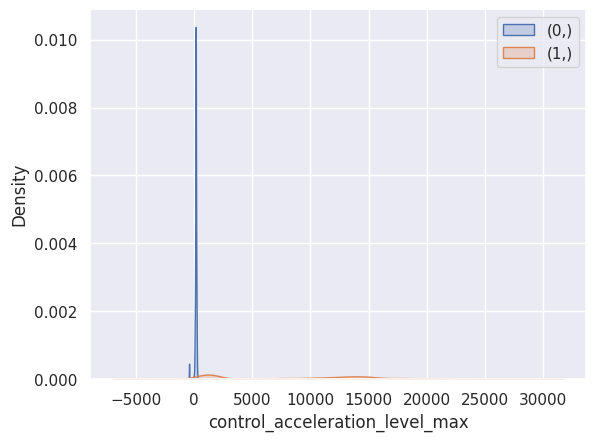

In [98]:
for i, gdf in df.groupby(['vehicle_model', 'vehicle_model_modification']): #  vehicle_model_modification vehicle_id
    sns.kdeplot(gdf['control_acceleration_level_min'], fill=True, label=i)  
plt.legend()
plt.show()

# vehicle_model_modification для acceleration min  не нужен

for i, gdf in df.groupby(['vehicle_model']): #  vehicle_model_modification vehicle_id
    if i == (0,0):
        continue
    sns.kdeplot(gdf['control_acceleration_level_max'], fill=True, label=i)  
plt.legend()
plt.show()

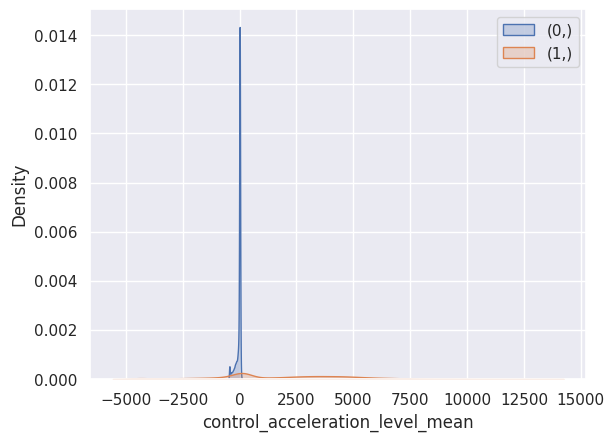

In [97]:
for i, gdf in df.groupby(['vehicle_model']): #  vehicle_model_modification vehicle_id
    sns.kdeplot(gdf['control_acceleration_level_mean'], fill=True, label=i)  
plt.legend()
plt.show()

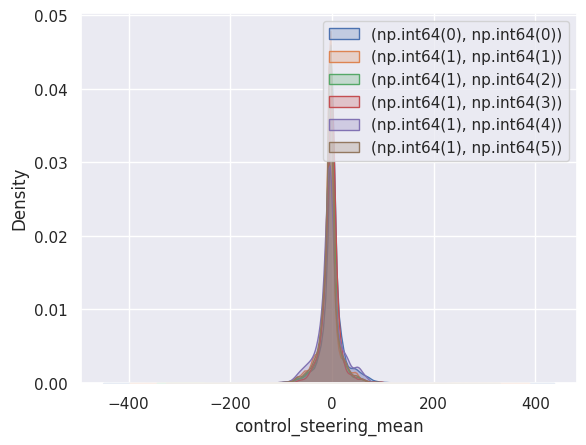

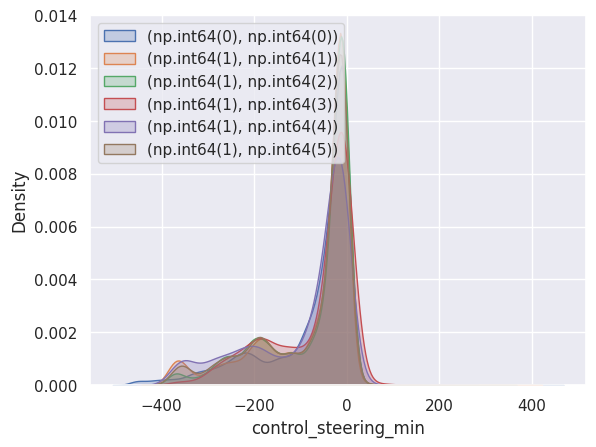

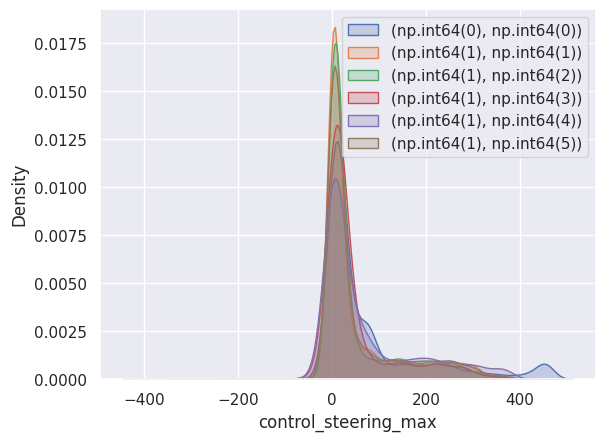

In [100]:
for i, gdf in df.groupby(['vehicle_model', 'vehicle_model_modification']): #  vehicle_model_modification vehicle_id
    sns.kdeplot(gdf['control_steering_mean'], fill=True, label=i)  
plt.legend()
plt.show()
for i, gdf in df.groupby(['vehicle_model', 'vehicle_model_modification']): #  vehicle_model_modification vehicle_id
    sns.kdeplot(gdf['control_steering_min'], fill=True, label=i)  
plt.legend()
plt.show()
for i, gdf in df.groupby(['vehicle_model', 'vehicle_model_modification']): #  vehicle_model_modification vehicle_id
    sns.kdeplot(gdf['control_steering_max'], fill=True, label=i)  
plt.legend()
plt.show()

In [103]:
from collections import defaultdict
vehicle_model2data = defaultdict(list)
for d in tqdm([*glob('YandexCup2024v2/YaCupTrain/*'), *glob('YandexCup2024v2/YaCupTest/*')]):
    with open(f'{d}/metadata.json') as f:
        meta = json.load(f)
    for f in glob(f'{d}/*.csv'):
        bname = Path(f).stem
        df = pd.read_csv(f)
        for i in df.columns:
            v = df[i].values
            vehicle_model2data[(meta['vehicle_model'], i)].extend(v)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [09:56<00:00, 83.77it/s]


In [107]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler

  Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 39.9 MB/s eta 0:00:0000:010:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [108]:
# acceleration_level	steering

vert2acceleration_level = defaultdict(list)
vert2steering = defaultdict(list)
for (vert, key), v in vehicle_model2data.items():
    if key == 'acceleration_level':
        vert2acceleration_level[vert].extend(v)
    elif key == 'steering':
        vert2steering[vert].extend(v)
    else:
        print(f"Skip {vert}, {key}")
    

Skip 0, stamp_ns
Skip 0, x
Skip 0, y
Skip 0, z
Skip 0, roll
Skip 0, pitch
Skip 0, yaw
Skip 1, stamp_ns
Skip 1, x
Skip 1, y
Skip 1, z
Skip 1, roll
Skip 1, pitch
Skip 1, yaw


In [109]:
vert2feats = {k:[[a, s] for a, s in zip(v,vert2steering[k])] for k,v in vert2acceleration_level.items()}

In [110]:
scaler_for_model = {}
for k, feats in vert2feats.items():
    feats = np.asarray(feats, dtype=float)
    scaler = StandardScaler()
    scaler.fit(feats)
    scaler_for_model[k] = scaler

In [111]:
scaler_for_model

{0: StandardScaler(), 1: StandardScaler()}

In [115]:
scaler_for_model[0].scale_

array([151.81702408,  57.31074714])

In [116]:
scaler_for_model[0].mean_

array([-45.45465766,   0.87009821])

In [117]:
scaler_for_model[0].var_

array([23048.40879974,  3284.52173772])

In [119]:
print(scaler_for_model[1].scale_)
print(scaler_for_model[1].mean_)
print(scaler_for_model[1].var_)

[4847.27032138   47.17538296]
[1845.2973844    -5.70109095]
[2.34960296e+07 2.22551676e+03]


In [120]:
import pickle

In [121]:
with open('YandexCup2024v2/scaler.pkl', 'wb') as f:
    pickle.dump(scaler_for_model, f)

In [122]:
for d in tqdm([*glob('YandexCup2024v2/YaCupTrain/*'), *glob('YandexCup2024v2/YaCupTest/*')]):
    with open(f'{d}/metadata.json') as f:
        meta = json.load(f)
    df = pd.read_csv(f'{d}/control.csv')
    normalized = scaler_for_model[meta['vehicle_model']].transform(df[['acceleration_level', 'steering']].values)
    df['norm_acceleration_level'] = normalized[:, 0]
    df['norm_steering'] = normalized[:, 1]
    df.to_csv(f'{d}/control_norm_v1.csv', index=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [16:44<00:00, 49.76it/s]


In [124]:
!ls YandexCup2024v2/YaCupTrain/0

control.csv  control_norm_v1.csv  localization.csv  metadata.json


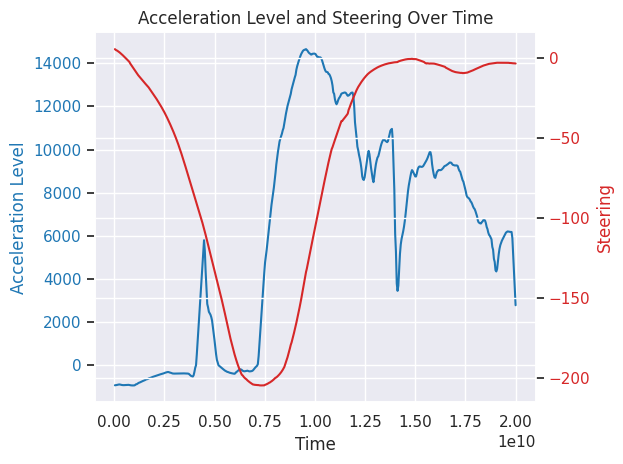

In [125]:
control_df = pd.read_csv('YandexCup2024v2/YaCupTest/0/control_norm_v1.csv')
time = control_df['stamp_ns'].values
acceleration_level = control_df.acceleration_level.values
steering = control_df.steering.values
# Создаем фигуру и оси
fig, ax1 = plt.subplots()

# Рисуем график для acceleration_level
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Acceleration Level', color=color)
ax1.plot(time, acceleration_level, color=color, label='Acceleration Level')
ax1.tick_params(axis='y', labelcolor=color)

# Создаем второй объект оси для steering
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Steering', color=color)
ax2.plot(time, steering, color=color, label='Steering')
ax2.tick_params(axis='y', labelcolor=color)

# Добавляем заголовок и легенду
plt.title('Acceleration Level and Steering Over Time')
fig.tight_layout()  # adjusts layout to avoid overlap
plt.show()